# Figure 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


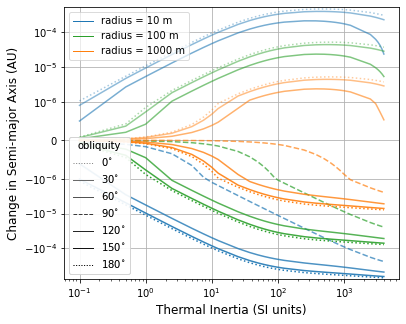

In [1]:
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

########### Lists for iteration #########################
obliquity_list = [0, (1/6)*np.pi, (2/6)*np.pi, (3/6)*np.pi, (4/6)*np.pi, (5/6)*np.pi, np.pi]
thermal_inertia_list = [.1, .5, 1, 2.5, 5, 7.5, 10, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 125, 250, 375, 500, 625, 750, 875, 1000, 1250, 2500, 3000, 3250, 3500, 3750, 4000]

#unit converters (changes to sim units of AU/Msun/yr) 
au_conv = 1.495978707e11 #m to AU
msun_conv = 1.9885e30 #kg to Msun
yr_conv = 31557600.0 # sec to yr

#Unchanging parameters in each sim
density = (1300*au_conv**3)/msun_conv #density of the object - Lauretta et al. (2019)
c = (2.998e8*yr_conv)/au_conv #speed of light
lstar = (3.828e26*yr_conv**3)/(msun_conv*au_conv**2) #luminosity of Sun
albedo = .007 #albedo of object - Nolan et al. 2013
stef_boltz = ((5.670e-8)*yr_conv**3)/(msun_conv) #Stefan-Boltzmann constant
emissivity = .9 #emissivity of object - Chesley et al. (2014)
k = .25 #constant between 0 and .25  
rotation_period = (6*60*60)/yr_conv #rotation period of object - Lauretta et al. (2019)

###########  RADIUS = 10 m #########################
zero_obliquity_changing_a_10 = []
thirty_obliquity_changing_a_10 = []
sixty_obliquity_changing_a_10 = []
ninety_obliquity_changing_a_10 = []
onetwenty_obliquity_changing_a_10 = []
onefifty_obliquity_changing_a_10 = []
oneeighty_obliquity_changing_a_10 = []

for i in range(len(thermal_inertia_list)):
    for j in range(len(obliquity_list)):
        
        #Simulation begins here
        sim = rebound.Simulation()

        sp = sim.particles #simplifies way to access particles parameters 

        sim.units = ('yr', 'AU', 'Msun') #changes simulation and G to units of solar masses, years, and AU  
        sim.integrator = "whfast" #integrator for sim
        sim.dt = .05 #timestep for sim
    
        asteroid_a = 3.165802 #semi-major axis of 7231 Veritas - Taken from Carruba et al. (2017)
        
        sim.add(m=1) #Adds Sun 
        sim.add(a=asteroid_a, m=0) #adds test particle

        #Moves all particles to center of momentum frame
        sim.move_to_com()
    
        #Loads the effect into Rebound
        rebx = reboundx.Extras(sim)
        yark = rebx.load_force("yarkovsky_effect")

        #Converts units of parameters from m/kg/sec to AU/Msun/yr
        radius = 10/au_conv #radius of object
        Gamma =  (thermal_inertia_list[i]*yr_conv**(5/2))/(msun_conv) #thermal inertia of object
        
        #These three parametrs decsribe the spin axis vector (or tilt) of the object
        sx = np.sin(obliquity_list[j])
        sy = 0
        sz = np.cos(obliquity_list[j])
        
        #Sets the parameters for the effect
        sp[1].params["ye_flag"] = 0 #setting this flag to 0 will give us the full version of the effect
        sp[1].params["ye_body_density"] = density
        yark.params["ye_c"] = c #set on the sim and not a particular particle
        yark.params["ye_lstar"] = lstar #set on the sim and not a particular particle
        sp[1].r = radius #remember radius is not inputed as a Rebx parameter - it's inputed on the particle in the Rebound sim
        sp[1].params["ye_albedo"] = albedo
        yark.params["ye_stef_boltz"] = stef_boltz #set on the sim and not a particular particle
        sp[1].params["ye_emissivity"] = emissivity
        sp[1].params["ye_k"] = k
        sp[1].params["ye_thermal_inertia"] = Gamma
        sp[1].params["ye_rotation_period"] = rotation_period
        sp[1].params["ye_spin_axis_x"] = sx
        sp[1].params["ye_spin_axis_y"] = sy
        sp[1].params["ye_spin_axis_z"] = sz

        rebx.add_force(yark) #adds the force to the simulation

        tmax= 1e4 # in yrs
    
        a_start = asteroid_a #starting semi-major axis for the asteroid
        
        sim.integrate(tmax) #integrates system for tmax years  
    
        a_final = sp[1].a #semi-major axis of asteroid after the sim 
    
        change_in_a = a_final - a_start   

        if j == 0:
            zero_obliquity_changing_a_10.append(change_in_a)
        elif j == 1:
            thirty_obliquity_changing_a_10.append(change_in_a)    
        elif j == 2:
            sixty_obliquity_changing_a_10.append(change_in_a)
        elif j == 3:
            ninety_obliquity_changing_a_10.append(change_in_a)
        elif j == 4:
            onetwenty_obliquity_changing_a_10.append(change_in_a)
        elif j == 5:
            onefifty_obliquity_changing_a_10.append(change_in_a)
        elif j == 6:
            oneeighty_obliquity_changing_a_10.append(change_in_a)


###########  RADIUS = 100 m #########################
zero_obliquity_changing_a_100 = []
thirty_obliquity_changing_a_100 = []
sixty_obliquity_changing_a_100 = []
ninety_obliquity_changing_a_100 = []
onetwenty_obliquity_changing_a_100 = []
onefifty_obliquity_changing_a_100 = []
oneeighty_obliquity_changing_a_100 = []

for i in range(len(thermal_inertia_list)):
    for j in range(len(obliquity_list)):
        
        #Simulation begins here
        sim = rebound.Simulation()

        sp = sim.particles #simplifies way to access particles parameters 

        sim.units = ('yr', 'AU', 'Msun') #changes simulation and G to units of solar masses, years, and AU  
        sim.integrator = "whfast" #integrator for sim
        sim.dt = .05 #timestep for sim
    
        asteroid_a = 2.5
        sim.add(m=1) #Adds Sun 
        sim.add(a=asteroid_a,  m=0) #adds test particle - Chesley et al. (2014) solution 87 

        #Moves all particles to center of momentum frame
        sim.move_to_com()

    
        #Loads the effect into Rebound
        rebx = reboundx.Extras(sim)
        yark = rebx.load_force("yarkovsky_effect")

        #Converts units of parameters from m/kg/sec to AU/Msun/yr
        radius = 100/au_conv #radius of object - Carruba et al. 2017
        Gamma =  (thermal_inertia_list[i]*yr_conv**(5/2))/(msun_conv) #thermal inertia of object
        
        #These three parametrs decsribe the spin axis vector (or tilt) of the object
        sx = np.sin(obliquity_list[j])
        sy = 0
        sz = np.cos(obliquity_list[j])
        
        #Sets the parameters for the effect
        sp[1].params["ye_flag"] = 0 #setting this flag to 0 will give us the full version of the effect
        sp[1].params["ye_body_density"] = density
        yark.params["ye_c"] = c #set on the sim and not a particular particle
        yark.params["ye_lstar"] = lstar #set on the sim and not a particular particle
        sp[1].r = radius #remember radius is not inputed as a Rebx parameter - it's inputed on the particle in the Rebound sim
        sp[1].params["ye_albedo"] = albedo
        yark.params["ye_stef_boltz"] = stef_boltz #set on the sim and not a particular particle
        sp[1].params["ye_emissivity"] = emissivity
        sp[1].params["ye_k"] = k
        sp[1].params["ye_thermal_inertia"] = Gamma
        sp[1].params["ye_rotation_period"] = rotation_period
        sp[1].params["ye_spin_axis_x"] = sx
        sp[1].params["ye_spin_axis_y"] = sy
        sp[1].params["ye_spin_axis_z"] = sz

        rebx.add_force(yark) #adds the force to the simulation

        tmax= 1e4 # in yrs
    
        a_start = asteroid_a #starting semi-major axis for the asteroid
    
        sim.integrate(tmax) #integrates system for tmax years  

        a_final = sp[1].a #semi-major axis of asteroid after the sim 
    
        change_in_a = a_final - a_start   

        if j == 0:
            zero_obliquity_changing_a_100.append(change_in_a)
        elif j == 1:
            thirty_obliquity_changing_a_100.append(change_in_a)
        elif j == 2:
            sixty_obliquity_changing_a_100.append(change_in_a)
        elif j == 3:
            ninety_obliquity_changing_a_100.append(change_in_a)
        elif j == 4:
            onetwenty_obliquity_changing_a_100.append(change_in_a)
        elif j == 5:
            onefifty_obliquity_changing_a_100.append(change_in_a)
        elif j == 6:
            oneeighty_obliquity_changing_a_100.append(change_in_a)
                      


###########  RADIUS = 1000 m #########################
zero_obliquity_changing_a_1000 = []
thirty_obliquity_changing_a_1000 = []
sixty_obliquity_changing_a_1000 = []
ninety_obliquity_changing_a_1000 = []
onetwenty_obliquity_changing_a_1000 = []
onefifty_obliquity_changing_a_1000 = []
oneeighty_obliquity_changing_a_1000 = []

for i in range(len(thermal_inertia_list)):
    for j in range(len(obliquity_list)):
        
        #Simulation begins here
        sim = rebound.Simulation()

        sp = sim.particles #simplifies way to access particles parameters 

        sim.units = ('yr', 'AU', 'Msun') #changes simulation and G to units of solar masses, years, and AU  
        sim.integrator = "whfast" #integrator for sim
        sim.dt = .05 #timestep for sim
    
        asteroid_a = 2.5
        sim.add(m=1) #Adds Sun 
        sim.add(a=asteroid_a,  m=0) #adds test particle - Chesley et al. (2014) solution 87 

        #Moves all particles to center of momentum frame
        sim.move_to_com()
    
        #Loads the effect into Rebound
        rebx = reboundx.Extras(sim)
        yark = rebx.load_force("yarkovsky_effect")

        #Converts units of parameters from m/kg/sec to AU/Msun/yr
        radius = 1000/au_conv #radius of object - Carruba et al. 2017
        Gamma =  (thermal_inertia_list[i]*yr_conv**(5/2))/(msun_conv) #thermal inertia of object
        
        #These three parametrs decsribe the spin axis vector (or tilt) of the object
        sx = np.sin(obliquity_list[j])
        sy = 0
        sz = np.cos(obliquity_list[j])
        
        #Sets the parameters for the effect
        sp[1].params["ye_flag"] = 0 #setting this flag to 0 will give us the full version of the effect
        sp[1].params["ye_body_density"] = density
        yark.params["ye_c"] = c #set on the sim and not a particular particle
        yark.params["ye_lstar"] = lstar #set on the sim and not a particular particle
        sp[1].r = radius #remember radius is not inputed as a Rebx parameter - it's inputed on the particle in the Rebound sim
        sp[1].params["ye_albedo"] = albedo
        yark.params["ye_stef_boltz"] = stef_boltz #set on the sim and not a particular particle
        sp[1].params["ye_emissivity"] = emissivity
        sp[1].params["ye_k"] = k
        sp[1].params["ye_thermal_inertia"] = Gamma
        sp[1].params["ye_rotation_period"] = rotation_period
        sp[1].params["ye_spin_axis_x"] = sx
        sp[1].params["ye_spin_axis_y"] = sy
        sp[1].params["ye_spin_axis_z"] = sz

        rebx.add_force(yark) #adds the force to the simulation

        tmax= 1e4 # in yrs
    
        a_start = asteroid_a #starting semi-major axis for the asteroid
    
        sim.integrate(tmax) #integrates system for tmax years  
    
        a_final = sp[1].a #semi-major axis of asteroid after the sim 
    
        change_in_a = a_final - a_start   

        if j == 0:
            zero_obliquity_changing_a_1000.append(change_in_a)
        elif j == 1:
            thirty_obliquity_changing_a_1000.append(change_in_a)
        elif j == 2:
            sixty_obliquity_changing_a_1000.append(change_in_a)
        elif j == 3:
            ninety_obliquity_changing_a_1000.append(change_in_a)
        elif j == 4:
            onetwenty_obliquity_changing_a_1000.append(change_in_a)
        elif j == 5:
            onefifty_obliquity_changing_a_1000.append(change_in_a)
        elif j == 6:
            oneeighty_obliquity_changing_a_1000.append(change_in_a)
                      



fig1, ax1 = plt.subplots(figsize=(6, 5))

#radius of 10
ax1.plot(thermal_inertia_list, zero_obliquity_changing_a_10, color = 'tab:blue', label='radius = 10m', alpha = .4, linestyle='dotted')
ax1.plot(thermal_inertia_list, thirty_obliquity_changing_a_10, color = 'tab:blue', alpha = .5)
ax1.plot(thermal_inertia_list, sixty_obliquity_changing_a_10, color = 'tab:blue', alpha = .6)
ax1.plot(thermal_inertia_list, ninety_obliquity_changing_a_10, color = 'tab:blue', alpha = .7, linestyle='dashed')
ax1.plot(thermal_inertia_list, onetwenty_obliquity_changing_a_10, color = 'tab:blue', alpha = .8)
ax1.plot(thermal_inertia_list, onefifty_obliquity_changing_a_10, color = 'tab:blue', alpha = .9)
ax1.plot(thermal_inertia_list, oneeighty_obliquity_changing_a_10, color = 'tab:blue', alpha = 1.0, linestyle='dotted')


#radius of 100
ax1.plot(thermal_inertia_list, zero_obliquity_changing_a_100, color = 'tab:green', label='radius = 100m', alpha = .4, linestyle='dotted')
ax1.plot(thermal_inertia_list, thirty_obliquity_changing_a_100, color = 'tab:green', alpha = .5)
ax1.plot(thermal_inertia_list, sixty_obliquity_changing_a_100, color = 'tab:green', alpha = .6)
ax1.plot(thermal_inertia_list, ninety_obliquity_changing_a_100, color = 'tab:green', alpha = .7, linestyle='dashed')
ax1.plot(thermal_inertia_list, onetwenty_obliquity_changing_a_100, color = 'tab:green', alpha = .8)
ax1.plot(thermal_inertia_list, onefifty_obliquity_changing_a_100, color = 'tab:green', alpha = .9)
ax1.plot(thermal_inertia_list, oneeighty_obliquity_changing_a_100, color = 'tab:green', alpha = 1.0, linestyle='dotted')


#radius of 1000
ax1.plot(thermal_inertia_list, zero_obliquity_changing_a_1000, color = 'tab:orange', label='radius = 1000m', alpha = .4, linestyle='dotted')
ax1.plot(thermal_inertia_list, thirty_obliquity_changing_a_1000, color = 'tab:orange', alpha = .5)
ax1.plot(thermal_inertia_list, sixty_obliquity_changing_a_1000, color = 'tab:orange', alpha = .6)
ax1.plot(thermal_inertia_list, ninety_obliquity_changing_a_1000, color = 'tab:orange', alpha = .7, linestyle='dashed')
ax1.plot(thermal_inertia_list, onetwenty_obliquity_changing_a_1000, color = 'tab:orange', alpha = .8)
ax1.plot(thermal_inertia_list, onefifty_obliquity_changing_a_1000, color = 'tab:orange', alpha = .9)
ax1.plot(thermal_inertia_list, oneeighty_obliquity_changing_a_1000, color = 'tab:orange', alpha = 1.0, linestyle='dotted')


ax1.set_xlabel('Thermal Inertia (SI units)',fontsize='large')
ax1.set_ylabel("Change in Semi-major Axis (AU)", fontsize='large')
ax1.set_xscale('log')
ax1.set_yscale('symlog', linthresh=0.000001)
plt.grid()

#Legends 

#first legend      
first_legend_elements = [Line2D([0], [0], color='tab:blue', alpha=1.0, lw=1.0, label='radius = 10 m'),
                         Line2D([0], [0], color='tab:green', alpha=1.0, lw=1.0, label='radius = 100 m'), 
                         Line2D([0], [0], color='tab:orange', alpha=1.0, lw=1.0,label='radius = 1000 m')]                                  

#creates legend and adds it to graph
first_legend = plt.legend(handles=first_legend_elements, framealpha = .7, loc = 'upper left')
plt.gca().add_artist(first_legend)

#second legend      
second_legend_elements = [Line2D([0], [0], color='black', alpha=0.4, lw=1.0, linestyle='dotted', label='$0^{\circ}$'),
                          Line2D([0], [0], color='black', alpha=0.5, lw=1.0, label='$30^{\circ}$'), 
                          Line2D([0], [0], color='black', alpha=0.6, lw=1.0, label='$60^{\circ}$'), 
                          Line2D([0], [0], color='black', alpha=0.7, lw=1.0, linestyle='dashed', label='$90^{\circ}$'),
                          Line2D([0], [0], color='black', alpha=0.8, lw=1.0, label='$120^{\circ}$'),
                          Line2D([0], [0], color='black', alpha=0.9, lw=1.0, label='$150^{\circ}$'),
                          Line2D([0], [0], color='black', alpha=1.0, lw=1.0, linestyle='dotted', label='$180^{\circ}$')]                                  

#creates legend and adds it to graph
second_legend = plt.legend(handles=second_legend_elements, loc = 'lower left', framealpha = .7, title = 'obliquity')
plt.gca().add_artist(second_legend)

plt.savefig('images/fig1.eps', bbox_inches='tight', pad_inches=0.01)
plt.savefig('images/fig1.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('images/fig1.png', bbox_inches='tight', dpi=300)

plt.show()